# Exploratory data analysis

In [ ]:
# NOTE : EDA report is at the end of this page

In [1]:
import pandas as pd #to handling dataframes
import numpy as np

import seaborn as sns   #for plotting graphs
import matplotlib.pyplot as plt
    
from sklearn.preprocessing import LabelEncoder  # for encoding string categorical to numeric catgorical
from imblearn.over_sampling import SMOTE   #to handle imbalaced dataset


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('historic.csv')

In [4]:
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


# CHECK FOR NULL VALUES IN DATASET


In [5]:
df.isnull().value_counts()  # NO null values present in dataframe

item_no  category  main_promotion  color  stars  success_indicator
False    False     False           False  False  False                8000
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


# CHECK FOR DUPLICATED VALUES IN DATASET

In [7]:
df.duplicated().value_counts() # NO duplicates present in dataframe

False    8000
dtype: int64

In [ ]:
#############################################################################################
###########################################################################################

# Analysis on : item_no feature

In [9]:
df['item_no'].describe()

count      8000.000000
mean     546474.338375
std      256513.463874
min      100171.000000
25%      325001.500000
50%      547081.000000
75%      764312.250000
max      989740.000000
Name: item_no, dtype: float64

In [10]:
df['item_no'].duplicated().value_counts()

False    8000
Name: item_no, dtype: int64

As 'item_no' feature having high variance or all values are unique we can drop this feature as it will not help us in
     predicting output

In [11]:
df = df[['category','main_promotion','color','stars','success_indicator']]

In [12]:
df.head()

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top


In [150]:
#####################################################################
######################################################################

# Analysis on category feature 

In [14]:
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

There are 6 categories of product namely Tunic, Polo-Shirt, T-Shirt, Sweatshirt, Blouse, Hoodie
Here as features datatype is categorical we have to convert it into numerical datatype in feature engineering
as our model understand numerical values only

In [15]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(df['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [16]:
df['category'] = encoded_category1   # converting category in text to numbers / encoded once

In [17]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [18]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1)) # dictionary mapping the names to the numerical values
for category1, value1 in category_mapping1.items():  
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")  # encoded value with its original name

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


In [19]:
# Bivarite of category and success_indicator feature

In [20]:
pd.crosstab(df['category'], df['success_indicator'])
# Based on biivariate analysis we can conclude
# here we can see the success indicator  of 'T-shirt' is huge among all categories which is good for buisness
# while  in relative sense polo-shirt went flop more compared to their sucess in market 

success_indicator,flop,top
category,,
0,363,883
1,258,481
2,817,729
3,453,907
4,271,1188
5,653,997


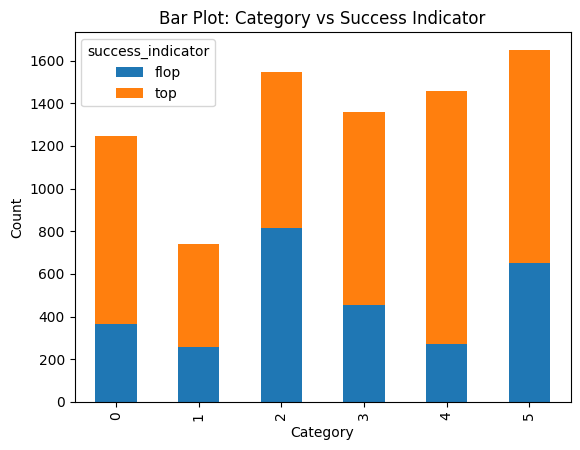

In [21]:
# as categorical features we can go for stacked_bar_plot 
cross_tab = pd.crosstab(df['category'], df['success_indicator']) 

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

In [133]:
df[df['category'] == 0].shape # 1246
df[(df['category'] ==  0 ) & (df['success_indicator'] == 1)].shape #883
#when category of product is Blouse then percent of success indicator = TOP will be 70.86%

(883, 6)

In [138]:
df[df['category'] == 1].shape # 739
df[(df['category'] ==  1 ) & (df['success_indicator'] == 1)].shape #481
#when category of product is Hoodie then percent of success indicator = TOP will be 65.08%

(481, 6)

In [140]:
df[df['category'] == 2].shape # 1546
df[(df['category'] ==  2 ) & (df['success_indicator'] == 1)].shape #729
#when category of product is Polo-Shirt then percent of success indicator = TOP will be 47.15%

(729, 6)

In [143]:
df[df['category'] == 3].shape # 1360
df[(df['category'] ==  3 ) & (df['success_indicator'] == 1)].shape #907
#when category of product is Sweatshirt then percent of success indicator = TOP will be 66.69%

(907, 6)

In [146]:
df[df['category'] == 4].shape # 1459
df[(df['category'] ==  4 ) & (df['success_indicator'] == 1)].shape #1188
#when category of product is T-Shirt then percent of success indicator = TOP will be 81.42%

(1188, 6)

In [149]:
df[df['category'] == 5].shape # 1650
df[(df['category'] ==  5 ) & (df['success_indicator'] == 1)].shape #997
#when category of product is Tunic then percent of success indicator = TOP will be 60.42%

(997, 6)

In [ ]:
##########################################################################################
############################################################################################

# Analysis on : main_promotion feature

In [23]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

Here for promotion of these product company used 4 mainways namely Category_Highlight, Catalog, Frontpage_Header,
Display_Ad_Campaign

In [24]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(df['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [25]:
df['main_promotion'] = encoded_main_promotion

In [26]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [27]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():  
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [28]:
# Bivarite of main_promotion and success_indicator feature

In [29]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2

success_indicator,flop,top
main_promotion,,
0,953,1293
1,930,1502
2,335,974
3,597,1416


here we can observe success rate is 
57% for Catalog
61% Category_Highlight
74% Display_Ad_Campaign
70% Frontpage_Header
Hence as per these bivariate analysis company should focus on Display_Ad_Campaign and Frontpage_Header promotions more
and other two as less

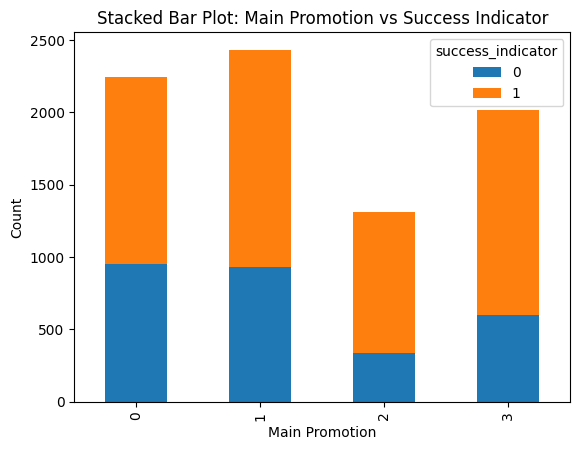

In [115]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [119]:
df[df['main_promotion'] == 0].shape # 2246
#df[(df['main_promotion'] == 0  ) & (df['success_indicator'] == 1)].shape #1293
#when main_promotion is via Catalog then percent of sucess indicator = TOP will be 57.56%

(2246, 6)

In [123]:
df[df['main_promotion'] == 1].shape # 2432
df[(df['main_promotion'] ==  1 ) & (df['success_indicator'] == 1)].shape #1502
#when main_promotion is via Category_Highlight then percent of sucess indicator = TOP will be 61.75%

(1502, 6)

In [126]:
df[df['main_promotion'] == 2].shape # 1309
df[(df['main_promotion'] == 2  ) & (df['success_indicator'] == 1)].shape #974
#when main_promotion is via Display_Ad_Campaign then percent of sucess indicator = TOP will be 74.40%

(974, 6)

In [129]:
df[df['main_promotion'] == 3].shape # 2013
df[(df['main_promotion'] == 3  ) & (df['success_indicator'] == 1)].shape #1416
#when main_promotion is via Frontpage_Header then percent of sucess indicator = TOP will be 70.34%

(1416, 6)

In [ ]:
##############################################################################################
##############################################################################################

# Analysis on : color feature

In [32]:
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded color category into num using label encoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [34]:
df['color'] = encoded_color

In [35]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [36]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3)) # dictionary mapping the names to the numerical values
for color, value3 in category_mapping3.items():  
    print(f"Encoded Category: {color}, Encoded Value: {value3}")  # encoded value with its original name

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


In [37]:
df.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,flop
1,1,1,7,1.5,flop
2,3,0,7,4.4,top
3,2,1,1,3.1,flop
4,1,1,3,4.1,top


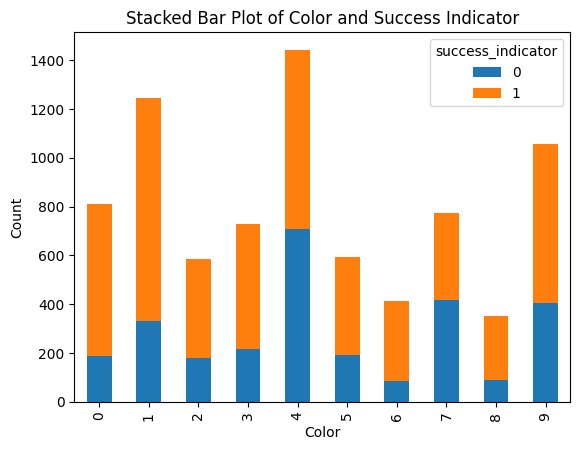

In [86]:
ct = pd.crosstab(df['color'], df['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [ ]:
df[df['color'] == 0].shape # 812
df[(df['color'] == 0  ) & (df['success_indicator'] == 1)].shape #623
#when product color is Black then percent of sucess indicator = TOP will be 76.72%

In [95]:
df[df['color'] == 1].shape # 1244
df[(df['color'] == 1  ) & (df['success_indicator'] == 1)].shape #912
#when product color is Blue then percent of sucess indicator = TOP will be 73.31%

(912, 6)

In [96]:
df[df['color'] == 2].shape # 585
df[(df['color'] == 2  ) & (df['success_indicator'] == 1)].shape #406
#when product color is Brown then percent of sucess indicator = TOP will be 69.47%

(406, 6)

In [99]:
df[df['color'] == 3].shape # 728
df[(df['color'] == 3  ) & (df['success_indicator'] == 1)].shape #511
#when product color is Green then percent of sucess indicator = TOP will be 70.19%

(511, 6)

In [114]:
df[df['color'] == 4].shape # 1443
df[(df['color'] == 4 ) & (df['success_indicator'] == 1)].shape #735
#when product color is Multi-Color then percent of sucess indicator = TOP will be 50.93%

(735, 6)

In [103]:
df[df['color'] == 5].shape # 592
df[(df['color'] == 5 ) & (df['success_indicator'] == 1)].shape #402
#when product color is Orange then percent of sucess indicator = TOP will be 67.90%

(402, 6)

In [107]:
df[df['color'] == 6].shape # 412
df[(df['color'] == 6 ) & (df['success_indicator'] == 1)].shape #325
#when product color is Pink then percent of sucess indicator = TOP will be 78.88%

(325, 6)

In [79]:
df[df['color'] == 7].shape #776
df[(df['color'] == 7 ) & (df['success_indicator'] == 1)].shape #359
#when product color is red then percent of sucess indicator = TOP will be 46.26%

(359, 6)

In [110]:
df[df['color'] == 8].shape # 352
df[(df['color'] == 8 ) & (df['success_indicator'] == 1)].shape #263
#when product color is White then percent of sucess indicator = TOP will be 74.71%

(263, 6)

In [113]:
df[df['color'] == 9].shape # 1056
df[(df['color'] == 9 ) & (df['success_indicator'] == 1)].shape #649
#when product color is Yellow then percent of sucess indicator = TOP will be 61.45%

(649, 6)

In [ ]:
###############################################################################################
###############################################################################################

# Analysis on :  stars feature

Here based on domain knowledge or as per mentioned in pdf of this problem we can convert stars into two bins
1st bin will contain all stars <=3 and will be for class 'FLOP' will assign it digit 0
2nd bin will contain all stars >3 and will be for class 'TOP' and will assign it digit 1

In [41]:
df.info() #original datatype of stars column is object but for num condition we have to convert it into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int32  
 1   main_promotion     8000 non-null   int32  
 2   color              8000 non-null   int32  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int32(3), object(1)
memory usage: 218.9+ KB


In [42]:
# Change data type of "Stars" from object to float
df['stars'] = df['stars'].astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int32  
 1   main_promotion     8000 non-null   int32  
 2   color              8000 non-null   int32  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int32(3), object(1)
memory usage: 218.9+ KB


In [44]:
df['stars'] = np.where(df['stars'] <= 3, 0, df['stars']) 
#BIN 1st where star <=3 will assign them as 0 as most of them are 'FLOP'

In [45]:
df['stars'] = np.where(df['stars'] > 3, 1, df['stars'])
#BIN 2nd where star > 3 will assign them as 1 as most of them are 'TOP'

In [46]:
df['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int32  
 1   main_promotion     8000 non-null   int32  
 2   color              8000 non-null   int32  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int32(3), object(1)
memory usage: 218.9+ KB


In [151]:
df.head()

,category,main_promotion,color,stars,success_indicator,encoded_success_indicator
0,5,0,3,1.0,0,0
1,1,1,7,0.0,0,0
2,3,0,7,1.0,1,1
3,2,1,1,1.0,0,0
4,1,1,3,1.0,1,1


In [154]:
df[df['stars'] == 1].shape # 5278
df[(df['stars'] == 1 ) & (df['success_indicator'] == 1)].shape #4364
#when product star rating 1 is i.e more than 3 then percent of sucess indicator = TOP will be 82.68 %

(4364, 6)

In [159]:
df[df['stars'] == 0].shape # 2722
df[(df['stars'] == 0  ) & (df['success_indicator'] == 1)].shape #821
#when product star rating  is 0 i.e less than eqaual to 3 then percent of sucess indicator = TOP will be 30 %

(821, 6)

In [ ]:
###############################################################################################################
###############################################################################################################

# Analysis on :  success_indicator feature

In [50]:
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [70]:
encoder = LabelEncoder()
df['success_indicator'] = encoder.fit_transform(df['success_indicator'])

In [71]:
df['success_indicator'].value_counts() # will encoded new target column WHERE TOP = 1 and FLOP =0

1    5185
0    2815
Name: encoded_success_indicator, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int32  
 1   main_promotion     8000 non-null   int32  
 2   color              8000 non-null   int32  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 187.6 KB


In [160]:
df.shape

(8000, 6)

In [ ]:
############################################################
##########################################################

# checking for Balancing and imbalancing of dataframe

In [161]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [162]:
(2815/8000)*100  # 35% of data belongs to 'FLOP'/0 class

35.1875

In [163]:
(5185/8000)*100  # 65% of data belongs to 'TOP'/1 class

64.8125

1 >> Hence data is imbalanced as data for 'FLOP' catagory / class is nearly half of 'TOP' class / category in Target  
     feature.
2 >> Problem with imbalaced data is that when we prepare model , our prediction will be biased towards class/category with
     majority of data i.e, 'TOP' in our case
3 >> we can choose various ways of balancing data ex, undersampling of majority class , oversampling of minority class , 
     or SMOTE technique

In [164]:
from imblearn.over_sampling import SMOTE
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [165]:
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_balanced)

       category  main_promotion  color  stars  encoded_success_indicator  \
0             5               0      3    1.0                          0   
1             1               1      7    0.0                          0   
2             3               0      7    1.0                          1   
3             2               1      1    1.0                          0   
4             1               1      3    1.0                          1   
...         ...             ...    ...    ...                        ...   
10365         4               2      0    1.0                          0   
10366         5               0      4    0.0                          0   
10367         5               0      3    0.0                          0   
10368         2               1      4    1.0                          0   
10369         0               1      1    0.0                          0   

       success_indicator  
0                      0  
1                      0  
2     

In [166]:
df_balanced.head()

,category,main_promotion,color,stars,encoded_success_indicator,success_indicator
0,5,0,3,1.0,0,0
1,1,1,7,0.0,0,0
2,3,0,7,1.0,1,1
3,2,1,1,1.0,0,0
4,1,1,3,1.0,1,1


In [167]:
df_balanced.shape

(10370, 6)

In [168]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

# Hence Our DATA is balanced with all values encoded in numbers which is prerequisite for the data required for model building

In [173]:
final_df = df_balanced.drop('encoded_success_indicator',axis=1)

In [174]:
final_df

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,0
1,1,1,7,0.0,0
2,3,0,7,1.0,1
3,2,1,1,1.0,0
4,1,1,3,1.0,1
...,...,...,...,...,...
10365,4,2,0,1.0,0
10366,5,0,4,0.0,0
10367,5,0,3,0.0,0
10368,2,1,4,1.0,0


In [180]:
final_df.to_csv('train_df.csv',index=False)

In [2]:
# train_df will be our engineered training data suitable for chosen model

# Exploratory Data Analysis (EDA) Report:


Dataset Overview:
The dataset consists of 5 variables: 'item_no', 'Category', 'Color', 'main_promotion' and 'Success_Indicator'.

Univariate Analysis: Key insights

'item_no' : 
As 'item_no' feature having high variance or all values are unique we can drop this feature as it will not help us in
predicting output

'Category':
There are 6 categories of product namely Tunic, Polo-Shirt, T-Shirt, Sweatshirt, Blouse, Hoodie.
Here as features datatype is categorical we have to convert it into numerical datatype in feature engineering
as our model understand numerical values only

'main_promotion': 
Here for promotion of these product company used 4 mainways namely Category_Highlight, Catalog, Frontpage_Header,
Display_Ad_Campaign

'Color':
Colors are represented by the labels 'Red', 'Blue', and 'Green' etc.
The products are in 10 various colors , this features also we have to encode in numerical datatype

'Success_Indicator':
Success indicators are represented by the labels 'TOP' and 'FLOP'.
The count of 'TOP' is 5185, and the count of 'FLOP' is 2815, Which significe data is imbalaced
 'success_indicator' will be our target feature with categories flop and top , hence we have to build binary classification model such as (logistic regression , SVM classifier , decision tree , Ensemble models ets)


Bivariate Analysis: Key insights

Relationship between 'item_no' and 'Success_Indicator':
There is no relation between 'item_no' and 'Success_Indicator' as 'item_no' is with high varience of data in it and hence
we can look ahead of dropping it

Relationship between 'Category' and 'Success_Indicator':
Based on biivariate analysis we can observe the success indicator  of 'T-shirt' is huge among all categories which is good for buisness while  in relative sense polo-shirt went flop more compared to their sucess in market
when category of product is Blouse then percent of success indicator = TOP will be 70.86%
when category of product is Hoodie then percent of success indicator = TOP will be 65.08%
when category of product is Polo-Shirt then percent of success indicator = TOP will be 47.15%
when category of product is Sweatshirt then percent of success indicator = TOP will be 66.69%
when category of product is T-Shirt then percent of success indicator = TOP will be 81.42%
when category of product is Tunic then percent of success indicator = TOP will be 60.42%
Hence as per this analysis launching T-shirt product  will be good for buisness as having  81% success rate


Relationship between 'main_promotion' and 'Success_Indicator':
here we can observe success rate is 57% for Catalog 61% Category_Highlight 74% Display_Ad_Campaign 70% Frontpage_Header Hence as per these bivariate analysis company should focus on Display_Ad_Campaign and Frontpage_Header promotions more and other two as less
when main_promotion is via Catalog then percent of sucess indicator = TOP will be 57.56%
when main_promotion is via Category_Highlight then percent of sucess indicator = TOP will be 61.75%
when main_promotion is via Display_Ad_Campaign then percent of sucess indicator = TOP will be 74.40%
when main_promotion is via Frontpage_Header then percent of sucess indicator = TOP will be 70.34%
Hence as per this analysis launching product with Display_Ad_Campaign as main_promotion will be good for buisness as having 
74% success rate

Relationship between 'color' and 'Success_Indicator':
when product color is Black then percent of sucess indicator = TOP will be 76.72%
when product color is Blue then percent of sucess indicator = TOP will be 73.31%
when product color is Green then percent of sucess indicator = TOP will be 70.19%
when product color is Multi-Color then percent of sucess indicator = TOP will be 50.93%
when product color is Orange then percent of sucess indicator = TOP will be 67.90%
when product color is Pink then percent of sucess indicator = TOP will be 78.88%
when product color is red then percent of sucess indicator = TOP will be 46.26%
when product color is White then percent of sucess indicator = TOP will be 74.71%
when product color is Yellow then percent of sucess indicator = TOP will be 61.45%
Hence as per this analysis launching product with pink, black and white will be good for buisness.

Relationship between 'stars' and 'Success_Indicator':
when product star rating 1 is i.e stars more than 3 then percent of sucess indicator = TOP will be 82.68 %
when product star rating  is 0 i.e stars less than eqaual to 3 then percent of sucess indicator = TOP will be 30 %
hence higher the rating will be good for preduct accepetance by customers